In [15]:
import networkx as nx
import numpy as np
import datetime
from dateutil import parser
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook
import os
import pickle
from sklearn import preprocessing

In [16]:
edges = []
classes = []
embeds = []

with open("hepth/cora/cora.cites") as f:
    for line in f:
        edges.append((line.split()[0], line.split()[1]))
        
f.close()
        
with open("hepth/cora/cora.content") as f:
    for line in f:
        classes.append((line.split()[0], line.split()[-1]))
f.close()

with open("hepth/cora/cora.embed") as f:
    for line in f:
        embeds.append((line.split()[0], line.split()[1:]))
f.close()

embeds = embeds[1:]
    
print(len(edges), len(classes), len(embeds))

5429 2708 2708


In [17]:
g = nx.Graph()

g.add_edges_from(edges)

print(g.number_of_nodes())
print(g.number_of_edges())

2708
5278


In [18]:
uniques = list(set([x[1] for x in classes]))

map_dict = dict([(uniques[i], i) for i in range(len(uniques))])

classes = [(x[0], map_dict[x[1]]) for x in classes]

In [19]:
node_dict = {}
cur = 0

old_cur = cur
for node in g.nodes:
    if not node in node_dict:
        node_dict[node] = cur
        cur += 1
            
g = nx.relabel_nodes(g, node_dict)
classes = [(node_dict[x[0]], x[1]) for x in classes]

classes = sorted(classes)

nx.set_node_attributes(g, dict(classes), 'classes')

In [20]:
g = max(nx.connected_component_subgraphs(g), key=len)

In [21]:
node_dict = {}
cur = 0

old_cur = cur
for node in g.nodes:
    if not node in node_dict:
        node_dict[node] = cur
        cur += 1
            
g = nx.relabel_nodes(g, node_dict)

In [22]:
layout = nx.kamada_kawai_layout(g)

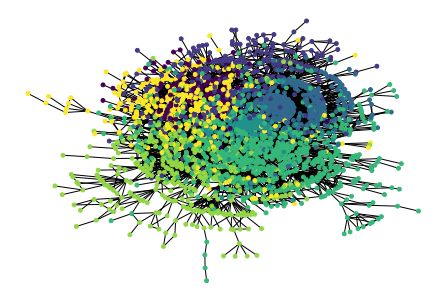

In [23]:
nx.draw(g, node_size=15, node_color=[nx.get_node_attributes(g, 'classes')[i] for i in g.nodes], pos=layout, cmap='viridis')

In [25]:
nx.write_graphml(g, 'hepth/cora.graphml')

In [24]:
print(nx.algorithms.cluster.average_clustering(g))

0.2376355109554117


In [33]:
# embeds = []
# with open("hepth/cora/cora.embed") as f:
#     for line in f:
#         embeds.append((line.split()[0], line.split()[1:]))
# f.close()

# embeds = embeds[1:]

# embeds = [(node_dict[x[0]], x[1]) for x in embeds]
# embeds = sorted(embeds)
# embeds = [x[1] for x in embeds]
# embeds = [[float(x) for x in emb] for emb in embeds]
# embeds = np.array(embeds)

# pickle.dump(embeds, open('w2v_cora.emb', 'wb'))

In [34]:
# embeds.shape

(2708, 8)